In [67]:
#Importing All Essential library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score

import matplotlib.pyplot as plt


In [28]:
#Reading the Credit Card Dataset

cc_df=pd.read_csv('creditcard.csv')
print(cc_df.shape)
cc_df.head(10)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [29]:
cc_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [66]:
cc_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
cc_df['Class'].value_counts()  #How Many 0 & 1 are there

0    284315
1       492
Name: Class, dtype: int64

In [32]:
y=cc_df['Class']
print(y)
cc_df.drop(columns='Class' ,inplace = True)



0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(cc_df, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_test))
print(len(y_train))


227845
56962
56962
227845


In [36]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


# ConFusion Matrix

In [71]:
#Total 492 1's are there

print(confusion_matrix(y_test,pred))

print('Precision score: ',precision_score(y_test,pred))

print('Recall Score:    ',recall_score(y_test,pred))

print('F1 Score:        ',f1_score(y_test,pred))

#accuracy_score(y_test,pred)

[[56829    35]
 [   44    54]]
Precision score:  0.6067415730337079
Recall Score:     0.5510204081632653
F1 Score:         0.5775401069518716


# Logistic Regression

In [65]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

pred=logreg.predict(X_test)
print('Predication: ',pred)
print('-------------------------------------------------------------------------------------------------------')

probabs=logreg.predict_proba(X_test)  #Retuens the probab
print(probabs)

print('-------------------------------------------------------------------------------------------------------')
pos_probabs=probabs[::,1]      #Probability estimates as the thresholds
print(pos_probabs)

print('-------------------------------------------------------------------------------------------------------')



fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)

fpr,tpr,thresholds  #Observed how the FPR increases , as the threshold decreases


Predication:  [1 0 0 ... 0 0 0]
-------------------------------------------------------------------------------------------------------
[[1.55831633e-05 9.99984417e-01]
 [9.99667566e-01 3.32434261e-04]
 [9.97975388e-01 2.02461234e-03]
 ...
 [9.99778077e-01 2.21923009e-04]
 [9.99902171e-01 9.78294520e-05]
 [9.99935746e-01 6.42536289e-05]]
-------------------------------------------------------------------------------------------------------
[9.99984417e-01 3.32434261e-04 2.02461234e-03 ... 2.21923009e-04
 9.78294520e-05 6.42536289e-05]
-------------------------------------------------------------------------------------------------------


C:\Users\aksom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.75858188e-05,
        1.75858188e-05, 1.75858188e-05, 3.51716376e-05, 3.51716376e-05,
        5.27574564e-05, 5.27574564e-05, 8.79290940e-05, 8.79290940e-05,
        1.05514913e-04, 1.05514913e-04, 1.23100732e-04, 1.23100732e-04,
        1.58272369e-04, 1.58272369e-04, 1.75858188e-04, 1.75858188e-04,
        2.11029826e-04, 2.11029826e-04, 2.28615644e-04, 2.28615644e-04,
        2.46201463e-04, 2.46201463e-04, 2.63787282e-04, 2.63787282e-04,
        4.22059651e-04, 4.22059651e-04, 4.74817107e-04, 4.74817107e-04,
        5.09988745e-04, 5.09988745e-04, 6.15503658e-04, 6.15503658e-04,
        6.33089477e-04, 6.33089477e-04, 6.68261114e-04, 6.68261114e-04,
        7.91361846e-04, 7.91361846e-04, 8.79290940e-04, 8.79290940e-04,
        9.32048396e-04, 9.32048396e-04, 1.00239167e-03, 1.00239167e-03,
        1.14307822e-03, 1.14307822e-03, 1.38927968e-03, 1.38927968e-03,
        1.45962296e-03, 1.45962296e-03, 1.89926843e-03, 1.899268

# AUC - Area Under Curve

0.7752024522527075

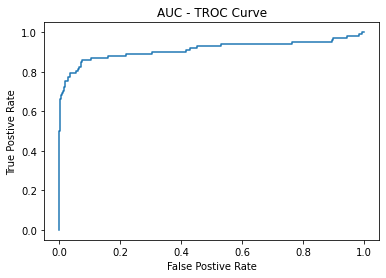

In [63]:
plt.plot(fpr,tpr)

plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC - TROC Curve')

roc_auc_score(y_test,pred)